In [1]:
!date

Sat Feb 20 14:22:31 PST 2016


In [2]:
%matplotlib inline

from __future__ import division, print_function

import theano
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.rpy.common as common

from time import time
from scipy.optimize import minimize
from theano import In, tensor, function, shared

/Users/drew.okane/anaconda/envs/deo-env/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


# Linear Regression

Linear regression is perhaps the simplest example of a statistical/machine learning problem. For example, say we want to hypothesize that there is a relationship between the stopping distance of a car and its speed, as found in the 'cars' data set.

In [3]:
df = common.load_data('cars')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
speed    50 non-null float64
dist     50 non-null float64
dtypes: float64(2)
memory usage: 1.2 KB


If we look at the data, you could potentially see a linear relationship between these two variables, i.e. dist = m * speed + constant. This is of course approximate. There is going to be some error so we hypothesize, conveniently but perhaps inappropriately, that the errors are normally distributed, with mean zero, and with some variance we don't know yet.

/Users/drew.okane/anaconda/envs/deo-env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


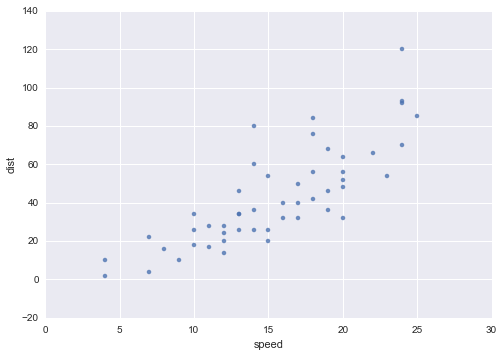

In [5]:
sns.regplot('speed', 'dist', data=df, fit_reg=False)

So what is the linear equation that fits this data then?

In [6]:
# Set up the variables that theano will use
X = tensor.vector('X')
Y = tensor.vector('Y')
params = tensor.vector('params')

# Construct the mean of the model
mu = tensor.dot(params[1], X) + params[0]

# Construct the negative log likelihood
likelihood = -1 * (-0.5 * tensor.log(2 * np.pi * tensor.square(params[2])) -
                   tensor.sum(tensor.square(Y - mu)) / (2 * tensor.square(params[2])))

# The compiled, callable theano function
nll = function([params, In(X, value=df['speed'].values), In(Y, value=df['dist'].values)],
               likelihood)
nll_jac = function([params, In(X, value=df['speed'].values), In(Y, value=df['dist'].values)],
                   tensor.jacobian(likelihood, params))
nll_hess = function([params, In(X, value=df['speed'].values), In(Y, value=df['dist'].values)],
                   tensor.hessian(likelihood, params))

In [7]:
minimize(nll, [1, 1, 1], jac=nll_jac)

      fun: 6.08758013299555
 hess_inv: array([[  2.17438272e+03,  -1.26570397e+02,  -6.85473558e+00],
       [ -1.26570397e+02,   8.15934355e+00,   9.52164119e-01],
       [ -6.85473558e+00,   9.52164119e-01,   5.66100648e+03]])
      jac: array([ -2.49034676e-07,  -4.28547874e-06,   4.71626527e-09])
  message: 'Optimization terminated successfully.'
     nfev: 92
      nit: 75
     njev: 92
   status: 0
  success: True
        x: array([ -17.57909396,    3.93240503,  106.55292937])

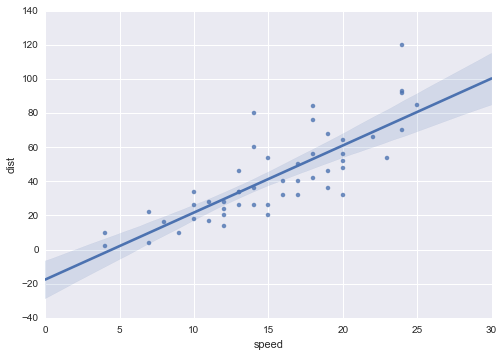

In [8]:
sns.regplot('speed', 'dist', data=df)

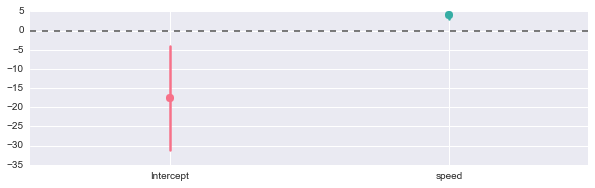

In [9]:
sns.coefplot('dist ~ speed', df, intercept=True)